In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import statsmodels.api as sm

df = pd.read_csv('Advertising.csv').iloc[:,1:]
print('Imports finalizados')

Imports finalizados


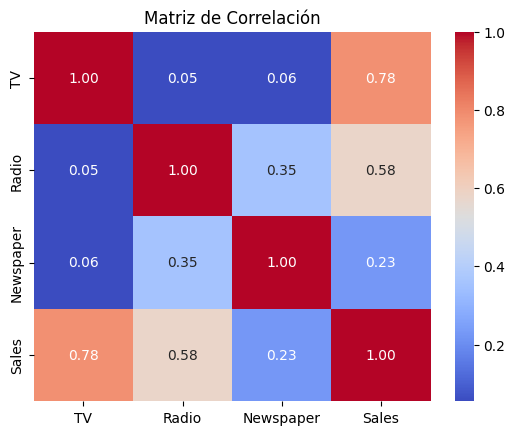

In [41]:
# Matriz de correlación
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

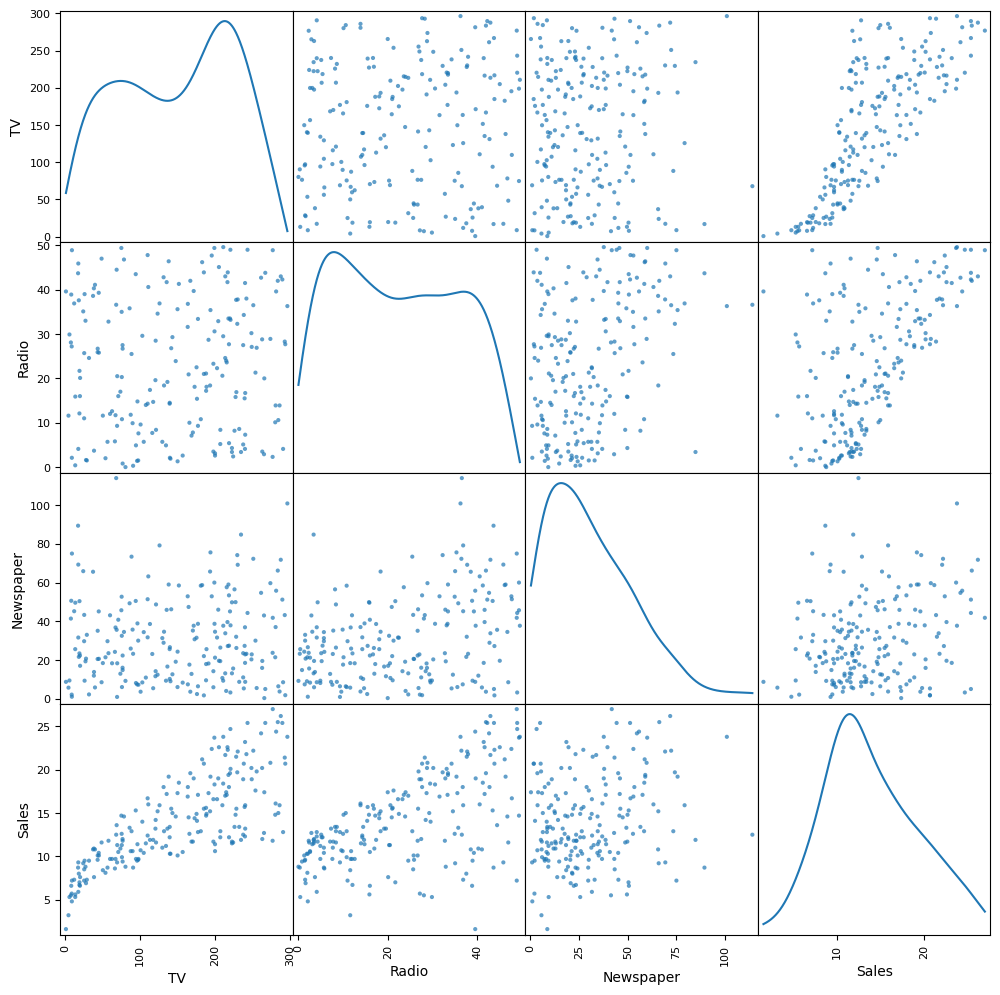

In [42]:
# Scatter plots de combinaciones
pd.plotting.scatter_matrix(df, alpha=0.7, figsize=(12, 12), diagonal='kde')
plt.show()

In [43]:
# Separación en train y test
columns = ['TV', 'Radio', 'Newspaper']
X = df[columns]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Separación terminada')

Separación terminada


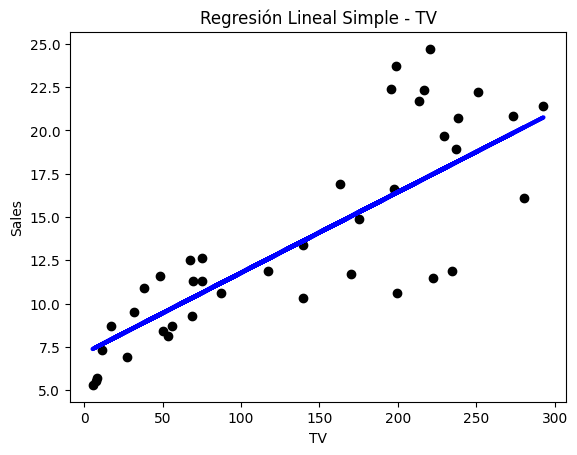

R cuadrado: 0.5911667812043271
R cuadrado ajustado: 0.588579229186633
Estadística F: 228.46566065602755
Valor p de la prueba F: 1.684068207028145e-32


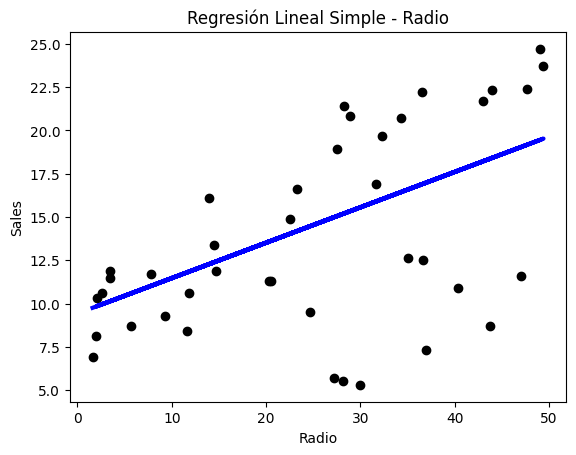

R cuadrado: 0.35090564286715287
R cuadrado ajustado: 0.3467974507334006
Estadística F: 85.41607389395755
Valor p de la prueba F: 1.5731231880188445e-16


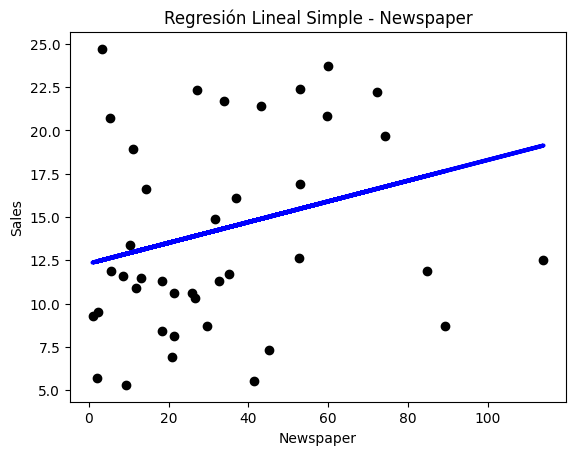

R cuadrado: 0.05658396829234358
R cuadrado ajustado: 0.05061298074989007
Estadística F: 9.476484063989995
Valor p de la prueba F: 0.002454460539526179


In [44]:
# Regresión Lineal Simple
models_simple = []
for feature in columns:
    X_feature = df[[feature]]
    X_train_feature, X_test_feature, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)
    
    model_simple = LinearRegression()
    model_simple.fit(X_train_feature, y_train)
    
    plt.scatter(X_test_feature, y_test, color='black')
    plt.plot(X_test_feature, model_simple.predict(X_test_feature), color='blue', linewidth=3)
    plt.title(f'Regresión Lineal Simple - {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.show()

    # Estadísticas
    model_simple = sm.OLS(y_train, sm.add_constant(X_train_feature)).fit()
    
    r_squared = model_simple.rsquared
    adj_r_squared = model_simple.rsquared_adj
    f_test = model_simple.fvalue
    f_test_p_value = model_simple.f_pvalue
    
    print(f"R cuadrado: {r_squared}")
    print(f"R cuadrado ajustado: {adj_r_squared}")
    print(f"Estadística F: {f_test}")
    print(f"Valor p de la prueba F: {f_test_p_value}")
    models_simple.append(model_simple)


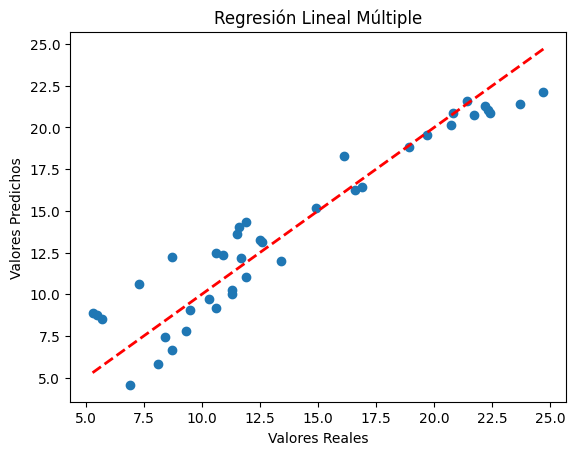

R cuadrado: 0.8957008271017817
R cuadrado ajustado: 0.8936950737768159
Estadística F: 446.56579448376715
Valor p de la prueba F: 2.5286578483026546e-76


In [57]:
# Regresión lineal múltiple
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
model_multiple = sm.OLS(y_train, X_train).fit()

X_test = sm.add_constant(X_test)
y_pred_multiple = model_multiple.predict(X_test)

plt.scatter(y_test, y_pred_multiple)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Regresión Lineal Múltiple')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.show()

r_squared = model_multiple.rsquared
adj_r_squared = model_multiple.rsquared_adj
f_test = model_multiple.fvalue
f_test_p_value = model_multiple.f_pvalue
    
print(f"R cuadrado: {r_squared}")
print(f"R cuadrado ajustado: {adj_r_squared}")
print(f"Estadística F: {f_test}")
print(f"Valor p de la prueba F: {f_test_p_value}")

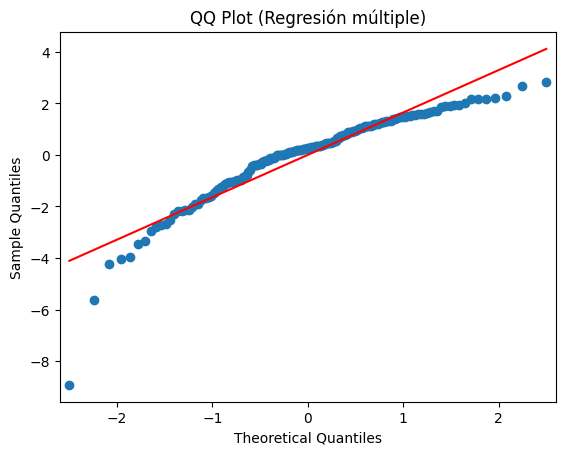

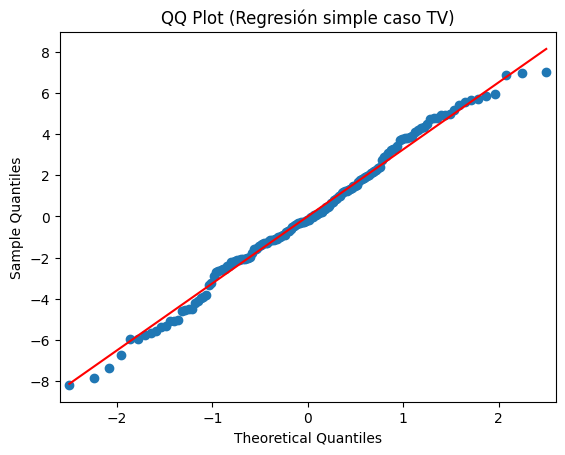

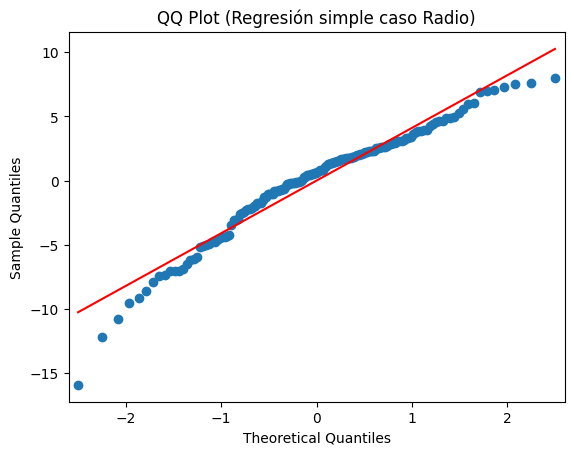

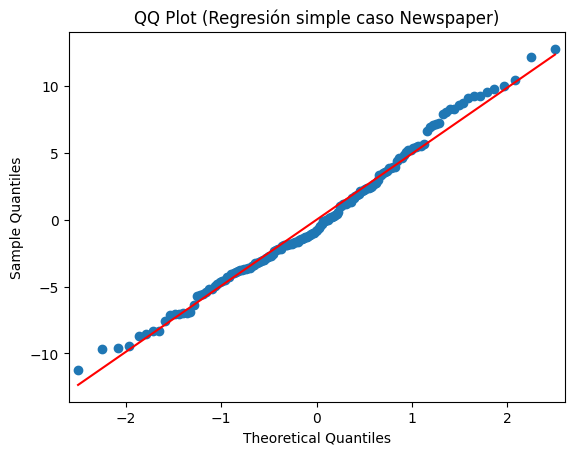

In [59]:
# QQplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats        

residuos = model_multiple.resid

sm.qqplot(residuos, line='s')
plt.title('QQ Plot (Regresión múltiple)')
plt.show()

j = 0
for simple in models_simple:
    residuos = simple.resid
    
    sm.qqplot(residuos, line='s')
    plt.title(f'QQ Plot (Regresión simple caso {columns[j]})')
    plt.show()
    j += 1

TV: 0.04472951746871631
Radio: 0.18919505423437652
Newspaper: 0.0027611143413670755


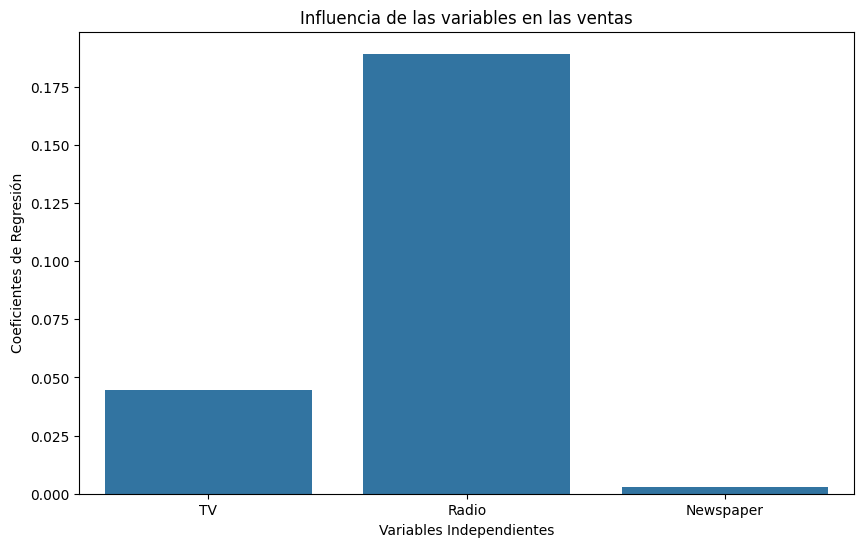

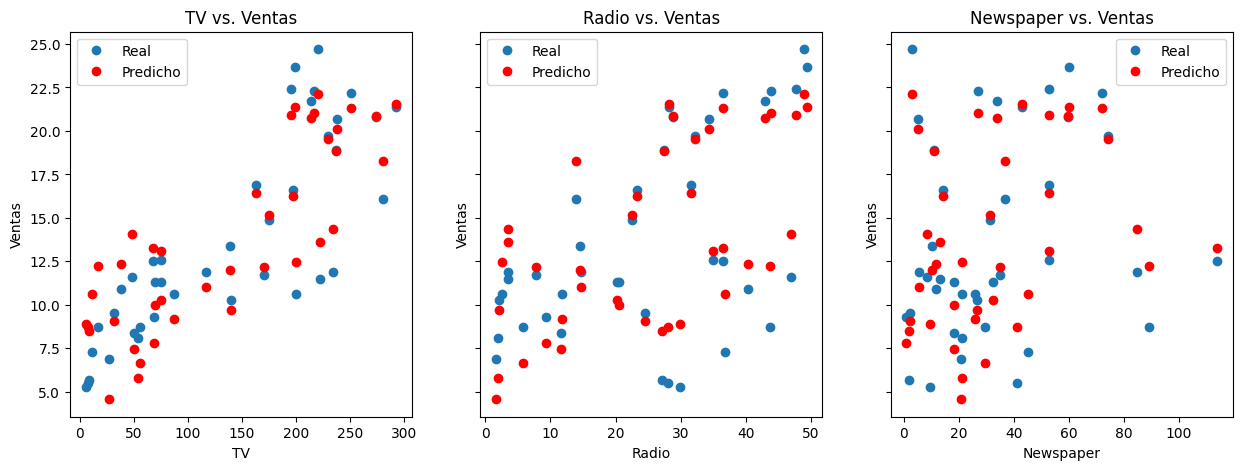

In [58]:
# Realizar el modelo de regresión lineal múltiple con statsmodels
X_train = sm.add_constant(X_train)  # Agregar el término constante
model_multiple = sm.OLS(y_train, X_train).fit()

# Obtener los coeficientes del modelo
coeficientes = model_multiple.params[1:]  # Excluyendo la constante

# Mostrar los coeficientes junto con el nombre de las variables independientes
for variable, coeficiente in zip(X_train.columns[1:], coeficientes):
    print(f"{variable}: {coeficiente}")

# Gráfico de barras de los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x=coeficientes.index, y=coeficientes.values)
plt.title('Influencia de las variables en las ventas')
plt.xlabel('Variables Independientes')
plt.ylabel('Coeficientes de Regresión')
plt.show()

# Gráficos de dispersión para cada variable independiente vs. ventas
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, variable in enumerate(X_train.columns[1:]):
    axs[i].plot(X_test[variable], y_test, 'o', label='Real')
    axs[i].plot(X_test[variable], model_multiple.predict(sm.add_constant(X_test)), 'o', label='Predicho', color='red')
    axs[i].set_title(f'{variable} vs. Ventas')
    axs[i].set_xlabel(variable)
    axs[i].set_ylabel('Ventas')
    axs[i].legend()

plt.show()